# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease (**classification**) based on their medical attributes.

## What is classification?

Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification**.

## Approach

We'll approach the problem with the following machine learning modelling framework:

| <img src="images/ml-framework.png" width="80%"> | 
|:--:| 
| 6 Step Machine Learning Modelling Framework |

<br>

We'll use **Pandas**, **Matplotlib** and **NumPy** for data anaylsis, as well as, **Scikit-Learn** for machine learning and modelling tasks.

| <img src="images/ml-framework-tools.png" width="80%"> | 
|:--:| 
| Tools which can be used for each step of the machine learning modelling process |

<br>

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy.

### 1. Problem Definition

In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of different **features** (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

### 2. Data

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

### 3. Evaluation

Since this project is experimental, let's assume something like, 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is because it provides a rough goal for us to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

### 4. Features

Features are different parts of the data. Below is the **data dictionary**.

#### Heart Disease Data Dictionary:

A data dictionary describes the data we're dealing with. Not all datasets come with them so this is where we may have to do our research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. **age** - age in years 


2. **sex**- (1 = male; 0 = female) 


3. **cp** - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease


4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern


5. **chol** - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern


6. **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes


7. **restecg** - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber


8. **thalach** - maximum heart rate achieved 


9. **exang** - exercise induced angina (1 = yes; 0 = no) 


10. **oldpeak** - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more


11. **slope** - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart


12. **ca** - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)


13. **thal** - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 


14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)



**Note:** No personal identifiable information (PPI) can be found in the dataset.

## Preparing the tools

* [Pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

Importing all the tools we need...

In [1]:
# Regular EDA and plotting libraries
import numpy as np  # np is short for numpy
import pandas as pd  # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

## Load the data

There are many different kinds of ways to store data. The typical way of storing tabular data, data similar to what you'd see in an Excel file is in `.csv` format. `.csv` stands for **comma seperated values**.

Pandas has a built-in function to read `.csv` files called `read_csv()` which takes the file pathname.

In [2]:
df = pd.read_csv('data/heart-disease-data.csv')  # DataFrame shortened to => df
df.shape  # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

Once we've imported our dataset, the next step is to explore. There's no set way of doing this. But what we should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your **data dictionary** and remind ourselves of what different columns mean.

Our goal is to become a subject matter expert on the dataset we're working with. So if someone asks a question about it, we can give them an explanation and when we start building models, we can sound check them to make sure they're not performing too well (**overfitting**) or why they might be performing poorly (**underfitting**).

Since EDA has no real set methodolgy, the following is a short check list we might want to walk through:

1. What question(s) are we trying to solve (or prove wrong)?
2. What kind of data do we have and how do we treat different types?
3. What’s missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

Once of the quickest and easiest ways to check the data is with the `head()` function. Calling it on any dataframe will print the top 5 rows, `tail()` calls the bottom 5. We can also pass a number to them like `head(10)` to show the top 10 rows.

In [3]:
# Let's check the top 5 rows of our dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# And the top 10
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


`value_counts()` allows us to show how many times each of the values of a categorical column appear.

In [5]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Since these two values are close to even, our target column can be considered **balanced**. An **unbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set.

We can also display these values in percentages. For this, `value_counts()` takes a parameter, `normalize` which can be set to `true`.

In [6]:
# Normalized value counts
df['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

We can plot the target column value counts by calling the `plot()` function and telling it what kind of plot we'd like.

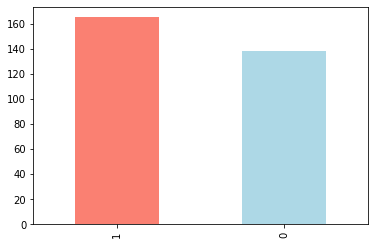

In [7]:
# Plot the value counts with a bar graph
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

`df.info()` shows a quick insight to the number of missing values we have and what type of data we're working with.

In our case, there are no missing values and all of our columns are numerical in nature.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Another way to get some quick insights on the dataframe is to use `df.describe()`. `describe()` shows a range of different metrics about the numerical columns such as **mean**, **max** and **standard deviation**.

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease frequency according to gender

`pd.crosstab(column_1, column_2)` can be used to compare two columns.

From our data dictionary, we can interpret for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

There are 207 males and 96 females in our study.

In [12]:
# Comparing target columns with sex columns
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


What can we infer from this? Let's make a simple heuristic.

Since there are about 100 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 75% chance she has heart disease.

As for males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

This can be our very **simple baseline**, we'll try to beat it with **machine learning**.

### Making our crosstab visual

Different metrics are represented best with different kinds of plots.

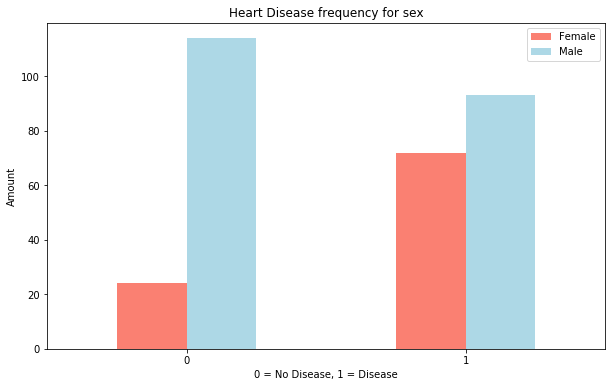

In [13]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['salmon', 'lightblue']);

# Add some attributes
plt.title('Heart Disease frequency for sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);  # Keeps the labels on x-axis vertical

### Age vs Max Heart rate for Heart Disease 

Let's try combining a couple of independent variables, such as, `age` and `thalach` (maximum heart rate) and then comparing them to our target variable heart disease.

Because there are so many different values for `age` and `thalach`, we'll use a scatter plot.

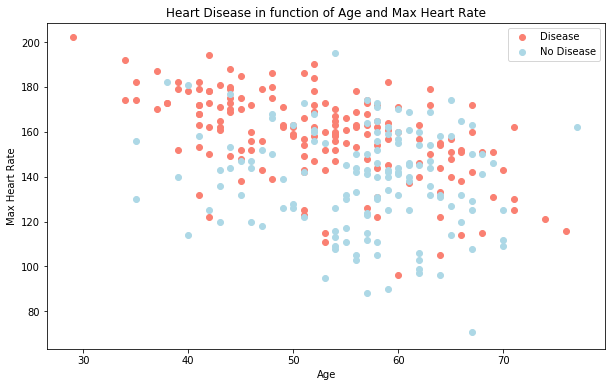

In [14]:
# Create another figure
plt.figure(figsize=(10, 6))

# Start with positive samples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

# Add some attributes
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

What can we infer from this?

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more blue dots there are. But this may be because there are more dots all together on the right side of the graph (older participants). This is purely observational!

Let's check the age distribution...

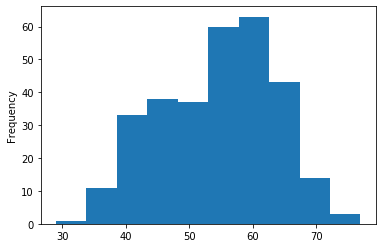

In [15]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

Let's try another independent variable. This time, `cp` (chest pain).

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


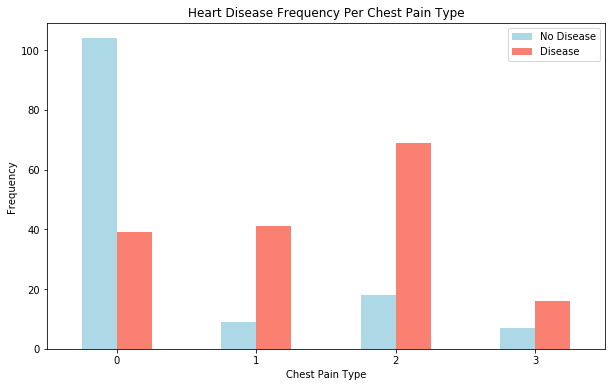

In [17]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

What can we infer from this?

From our data dictionary, the different levels of chest pain are:

`cp` - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease

It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

Although not conclusive, this graph above is a hint at the confusion of defintions being represented in data.

### Correlation between independent variables

To get an an idea about which independent variables may or may not have an impact on our target variable we'll compare all the independent variables in one hit.

We can do this using `df.corr()` which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

In [18]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


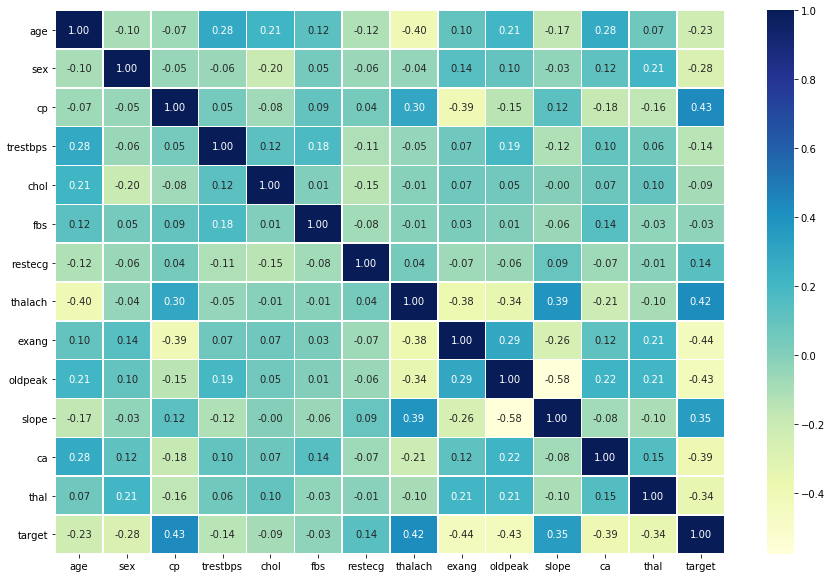

In [19]:
# Let's visualize it using seaborn heatmap
fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');

A **higher positive** value means a potential **positive correlation (increase)** and a **higher negative** value means a potential **negative correlation (decrease)**.

## Modeling

We'll try to use machine learning to predict our target variable based on the 13 independent variables.

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Features & Labels

We're trying to predict our target variable using all of the other variables. To do this, we'll split the target variable from the rest.

In [21]:
# Features 
X = df.drop('target', axis=1)

# Labels
y = df['target']

In [22]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Train & Test Split

To split our data into a training and test set, we can use Scikit-Learn's `train_test_split()` and feed it our independent and dependent variables (X & y).

In [24]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [26]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [27]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [28]:
y_test.head()

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

In [29]:
(len(X_train), len(y_train)), (len(X_test), len(y_test))

((242, 242), (61, 61))

### Model Selection

We'll be using the following and comparing their results:
1. Logistic Regression - [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [KNeighboursClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [30]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'K-Nearest Neighbors': KNeighborsClassifier(),
          'RandomForestClassifier': RandomForestClassifier()}

# Function to 'fit' and 'score' the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    '''
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    '''
    
    # Random seed for reproducibility
    np.random.seed(42)
    
    # Make a list to save the model scores
    model_scores = {}
    
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and save the scores to 'model_scores' dictionary
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Brijesh\Desktop\ml-projects\heart-disease-predictor\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbors': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

In [32]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,Logistic Regression,K-Nearest Neighbors,RandomForestClassifier
accuracy,0.885246,0.688525,0.836066


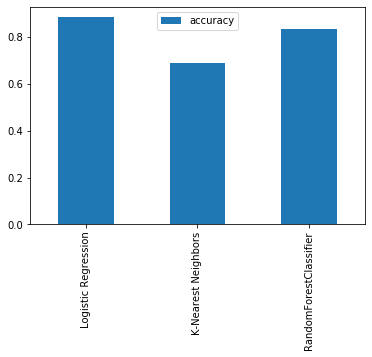

In [33]:
model_compare.T.plot.bar();

`LogisticRegression()` model performs the best!

The KNN's model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this, we'll discard KNN and focus on the other two.

### Hyperparameter tuning and cross-validation

#### Tuning models with - RandomizedSearchCV

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [34]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter = 20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [35]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                n_iter=20,
                                cv=5,
                                verbose=True)

# Fit the random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [36]:
# Let's view the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg_score = rs_log_reg.score(X_test, y_test)

In [38]:
# Let's view if the score has improved
print('** LogisticRegression Scoring **\n')
print(f'Default score: {model_scores["Logistic Regression"]}')
print(f'RandomizedSearchCV tuned score: {rs_log_reg_score}\n')

** LogisticRegression Scoring **

Default score: 0.8852459016393442
RandomizedSearchCV tuned score: 0.8852459016393442



Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [39]:
# Setup random seed
np.random.seed(42)

# Setup random search parameters for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

# Fit the random hyperparameter search model
rs_rf.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


In [40]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
# Evaluate the randomized search random forest model
rs_rf_score = rs_rf.score(X_test, y_test)

In [42]:
# Let's see if the model's score has improved
print('** RandomForestClassifier Scoring **\n')
print(f'Default score: {model_scores["RandomForestClassifier"]}')
print(f'RandomizedSearchCV tuned score: {rs_rf_score}\n')

** RandomForestClassifier Scoring **

Default score: 0.8360655737704918
RandomizedSearchCV tuned score: 0.8688524590163934



After tuning the hyperparameters for each model, there was a slight performance boost in `LogisticRegression` model.

Since `LogisticRegression` is pulling out in front, we'll try tuning it further with `GridSearchCV`.

#### Tuning models with - GridSearchCV

The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.

In short:

* `RandomizedSearchCV` - tries `n_iter` combinations of hyperparameters and saves the best.
* `GridSearchCV` - tries every single combination of hyperparameters and saves the best.

In [43]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [44]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [45]:
# Evaluate the tuned model
gs_log_reg_score = gs_log_reg.score(X_test, y_test)

In [46]:
# Let's see if the model's score has improved
print('** LogisticRegression Scoring **\n')
print(f'Default score: {model_scores["Logistic Regression"]}')
print(f'GridSearchCV tuned score: {gs_log_reg_score}\n')

** LogisticRegression Scoring **

Default score: 0.8852459016393442
GridSearchCV tuned score: 0.8852459016393442



In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

**Note:** If there are a large amount of hyperparameters combinations in your grid, `GridSearchCV` may take a long time to try them all out. This is why it's a good idea to start with `RandomizedSearchCV`, try a certain amount of combinations and then use `GridSearchCV` to refine them.

### Evaluating a classification model, beyond accuracy

In [47]:
# Make predictions on the test data
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [48]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

#### ROC and AUC curve

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

We'll use the `GridSearchCV` version of our `LogisticRegression` estimator, `gs_log_reg` as well as the test data, `X_test` and `y_test`.

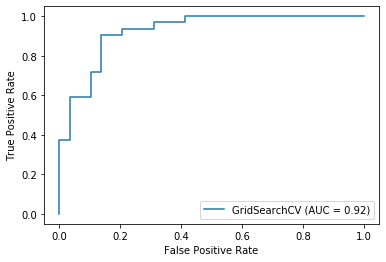

In [49]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, **AUC = 0.5**. But a perfect model would achieve an **AUC score = 1.0**, so there's still room for improvement.

#### Confusion Matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions.

In [50]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


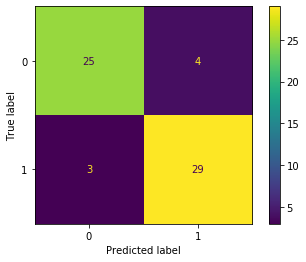

In [51]:
# Let's visualize
plot_confusion_matrix(gs_log_reg, X_test, y_test);

The model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 4 occasions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

#### Classification Report

In [52]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**What do they mean?**

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

We'll take the best model along with the best hyperparameters and use `cross_val_score()` along with various scoring parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using `cross-validation` and a defined scoring parameter.

In [53]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [54]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear')

Now we've got an instantiated classifier, let's find some cross-validated metrics.

**Accuracy**

In [55]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

Since there are 5 metrics here, we'll take the average.

In [56]:
cv_acc_avg = np.mean(cv_acc)
cv_acc_avg

0.8479781420765027

**Precision**

In [57]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring='precision'))
cv_precision

0.8215873015873015

**Recall**

In [58]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring='recall'))
cv_recall

0.9272727272727274

**F1 Score**

In [59]:
# Cross-validated f1 score
cv_f1 = np.mean(cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring='f1'))
cv_f1

0.8705403543192143

Let's visualize all of them...

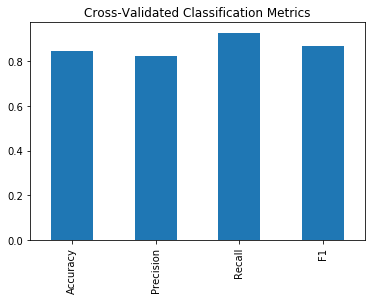

In [60]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc_avg,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics", legend=False);

The final thing to check off the list of our model evaluation techniques is **feature importance**.

## Feature Importance

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Or for our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

To do so, we'll use the `coef_` attribute. Looking at the Scikit-Learn documentation for `LogisticRegression`, the `coef_` attribute is the coefficient of the features in the decision function.

In [61]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [62]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490195,  0.02472938, -0.63120405, -0.57590942,
         0.47095136, -0.65165348, -0.69984206]])

In [63]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699220351664148,
 'sex': -0.9042408930260735,
 'cp': 0.6747282624694215,
 'trestbps': -0.011613401789010375,
 'chol': -0.0017036441780094993,
 'fbs': 0.047876883382302414,
 'restecg': 0.3349019539205334,
 'thalach': 0.024729383396378347,
 'exang': -0.6312040510578483,
 'oldpeak': -0.5759094230155162,
 'slope': 0.47095135616471195,
 'ca': -0.6516534832909596,
 'thal': -0.6998420628111434}

Now we've match the feature coefficients to different features, let's visualize them.

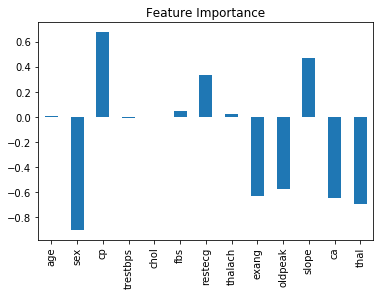

In [64]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

In [65]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

**What does this mean?**

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

In [66]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Looking back the data dictionary, we see slope is the "slope of the peak exercise ST segment" where:

* **0 : Upsloping:** better heart rate with excercise (uncommon)
* **1 : Flatsloping:** minimal change (typical healthy heart)
* **2 : Downslopins:** signs of unhealthy heart

According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.

Is this true?

When you look at the contrast (`pd.crosstab(df["slope"], df["target"]`) it is. As slope goes up, so does target.

> **The highest accuracy our model achieved was below 95%.**

### What next?

In this case, we know the current model we're using (a tuned version of `LogisticRegression`) along with our specific data set doesn't hit the target we set ourselves.

A good next step would be to discuss with the team or research on our own different options of going forward.

1. Could you collect more data?
2. Could you try a better model?
3. Could you improve the current models (beyond what we've done so far)?